# OpenAI Embedding VS NomicAI Embeddings
In this notebook we will discuss about OpenAI embedding (text-embedding-3) and NomicAI embedding (nomic-text)

and see which one of nomic-text quantization have a better result in Persian language.

In this notebook we will use lm-studio for running embedding model on our system.

First lets save our Persian sentences.

In [1]:
# 100 random Persian sentences with varying levels of similarity, ranging from low to very high.
persian_sentences = {
	0: "دیروز به پارک رفتم و دویدم.",
	1: "کتابی که به تازگی خریدم خیلی جذاب است.",
	2: "هوا امروز بسیار گرم بود.",
	3: "من و دوستانم دیشب فیلم تماشا کردیم.",
	4: "او در یک شرکت بزرگ کار می‌کند.",
	5: "امروز صبح یک لیوان چای نوشیدم.",
	6: "فصل پاییز بهترین زمان برای پیاده‌روی است.",
	7: "هفته آینده به مسافرت می‌روم.",
	8: "گربه من همیشه روی مبل می‌خوابد.",
	9: "از خرید در فروشگاه‌های شلوغ خوشم نمی‌آید.",
	10: "او هر روز ساعت هشت صبح بیدار می‌شود.",
	11: "دیشب برای شام پیتزا خوردیم.",
	12: "ماشینم امروز خراب شد و به تعمیرگاه بردم.",
	13: "من عاشق گل‌های بهاری هستم.",
	14: "برای ناهار یک ساندویچ درست کردم.",
	15: "او در حال خواندن یک کتاب تاریخی است.",
	16: "دیروز هوا خیلی سرد بود و برف بارید.",
	17: "من و خانواده‌ام همیشه در تابستان به شمال می‌رویم.",
	18: "این هفته قصد دارم خانه را تمیز کنم.",
	19: "به تازگی یک لپ‌تاپ جدید خریدم.",
	20: "او دوست دارد هر روز صبح پیاده‌روی کند.",
	21: "دیروز در مسابقه دو شرکت کردم.",
	22: "من عاشق شنیدن موسیقی کلاسیک هستم.",
	23: "این زمستان خیلی سردتر از سال‌های قبل بود.",
	24: "من همیشه صبح‌ها قهوه می‌نوشم.",
	25: "او تصمیم گرفت که در کلاس زبان ثبت‌نام کند.",
	26: "دیشب خواب عجیبی دیدم.",
	27: "به نظرم فیلم‌های کمدی بهترین فیلم‌ها هستند.",
	28: "من و خواهرم دیشب به سینما رفتیم.",
	29: "او هر روز صبح ورزش می‌کند.",
	30: "در بهار باغچه‌ام را پر از گل می‌کنم.",
	31: "کتابی که اخیراً خواندم درباره تاریخ ایران بود.",
	32: "دوست دارم هر روز صبح زود بیدار شوم.",
	33: "او عاشق نقاشی است و هر روز نقاشی می‌کشد.",
	34: "هفته گذشته به یک نمایشگاه هنری رفتم.",
	35: "او همیشه در کارهای گروهی مشارکت می‌کند.",
	36: "من عاشق تماشای غروب خورشید هستم.",
	37: "او به تازگی یک گلدان جدید خریده است.",
	38: "من همیشه در کلاس ریاضی موفق بوده‌ام.",
	39: "این پاییز برگ‌های درختان خیلی زیباست.",
	40: "او هر روز یک ساعت مطالعه می‌کند.",
	41: "من به تازگی یادگیری زبان جدیدی را شروع کردم.",
	42: "دیشب برای شام پاستا پختم.",
	43: "او همیشه از طبیعت لذت می‌برد.",
	44: "من به موسیقی سنتی علاقه دارم.",
	45: "هوا امروز خیلی ابری است.",
	46: "او تصمیم گرفت که به کلاس ورزش برود.",
	47: "من عاشق خواندن کتاب‌های داستانی هستم.",
	48: "به تازگی یک کتاب درباره تاریخ جهان خواندم.",
	49: "او همیشه به موقع به مدرسه می‌رود.",
	50: "دیروز با دوستم به خرید رفتم.",
	51: "من به تازگی شروع به یادگیری پیانو کردم.",
	52: "او در حال یادگیری نقاشی است.",
	53: "هر سال تابستان به مسافرت می‌رویم.",
	54: "من عاشق عطر گل‌های بهاری هستم.",
	55: "او هر روز صبحانه می‌خورد.",
	56: "دیشب با دوستانم به رستوران رفتیم.",
	57: "من همیشه در امتحانات موفق بوده‌ام.",
	58: "او هر روز یک ساعت مطالعه می‌کند.",
	59: "به تازگی یک کتاب درباره تاریخ جهان خواندم.",
	60: "او هر هفته به کلاس موسیقی می‌رود.",
	61: "من به تازگی شروع به دویدن کردم.",
	62: "او همیشه برای درس‌هایش تلاش می‌کند.",
	63: "من عاشق تماشای فیلم‌های ترسناک هستم.",
	64: "او تصمیم گرفت که یک سفر کوتاه داشته باشد.",
	65: "من هر روز صبح زود بیدار می‌شوم.",
	66: "او عاشق سفر به کوهستان است.",
	67: "دیروز یک جفت کفش جدید خریدم.",
	68: "من عاشق طبیعت هستم و هر هفته به کوه می‌روم.",
	69: "او هر شب قبل از خواب کتاب می‌خواند.",
	70: "من هر روز صبحانه می‌خورم.",
	71: "او به تازگی یک نقاشی از طبیعت کشیده است.",
	72: "هر سال تابستان به شمال می‌رویم.",
	73: "من به تازگی شروع به یادگیری زبان فرانسه کردم.",
	74: "او عاشق شنیدن موسیقی است.",
	75: "دیشب خواب دیدم که به یک سفر طولانی رفتم.",
	76: "من همیشه در کلاس‌های هنر شرکت می‌کنم.",
	77: "او هر روز صبح پیاده‌روی می‌کند.",
	78: "دیروز برای اولین بار به یک کلاس آشپزی رفتم.",
	79: "من عاشق کتاب‌های معمایی هستم.",
	80: "او هر روز صبح زود بیدار می‌شود.",
	81: "من هر هفته به کتابخانه می‌روم.",
	82: "او به تازگی یک کتاب درباره تاریخ خوانده است.",
	83: "دیشب با دوستانم فیلم تماشا کردم.",
	84: "من عاشق دیدن گل‌های بهاری هستم.",
	85: "او هر هفته به پارک می‌رود.",
	86: "دیروز با خانواده‌ام به پیک‌نیک رفتیم.",
	87: "من هر روز صبح دویدن را دوست دارم.",
	88: "او عاشق هنر و نقاشی است.",
	89: "من همیشه در کلاس‌های ریاضی موفق بوده‌ام.",
	90: "او هر روز صبحانه می‌خورد.",
	91: "به تازگی یک کتاب درباره تاریخ خوانده‌ام.",
	92: "من عاشق نوشیدن قهوه در صبح هستم.",
	93: "او هر روز به مدرسه می‌رود.",
	94: "دیروز یک فیلم دیدم که بسیار جالب بود.",
	95: "من هر هفته به ورزشگاه می‌روم.",
	96: "او هر روز یک ساعت تمرین پیانو می‌کند.",
	97: "دیشب خواب دیدم که در یک شهر دیگر هستم.",
	98: "من عاشق سفر به جاهای جدید هستم.",
	99: "او هر روز در پارک پیاده‌روی می‌کند.",
}

Now lets use OpenAI api key to embedd those sentences.

In [3]:
from openai import OpenAI
from dotenv import dotenv_values

client = OpenAI(api_key = "YOUR_API_KEY")

def get_embedding(text, model="text-embedding-3-large"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [5]:
import numpy as np

openAI_embedded_sentences = {}

for key, value in persian_sentences.items():
    openAI_embedded_sentences[key] = np.array([get_embedding(value)])


After embedding sentences using openAI embedding model, now we need to use nomic-text embedding and get the vectors like the before.

we use lm-studio to connect our local server for embedding.

In [6]:
from time import time

client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def get_embedding(text, model="nomic-ai/nomic-embed-text-v1.5-GGUF"):
    text = text.replace("\n", " ")
    a = time()
    embedded_text = client.embeddings.create(input = [text], model=model).data[0].embedding
    b = time()
    return (embedded_text, b - a)

In [7]:
nomic_embedded_sentences = {}
nomic_elapsed_times = {}

while True:
    quantization_model = input("Enter quantization name: ")
    if not quantization_model:
        break

    model_embeddings = {}
    model_elapsed_times = {}

    for key, value in persian_sentences.items():
        embedding, elapsed_time = get_embedding(value)
        model_embeddings[key] = np.array([embedding])
        model_elapsed_times[key] = elapsed_time

    nomic_embedded_sentences[quantization_model] = model_embeddings
    nomic_elapsed_times[quantization_model] = model_elapsed_times

Enter quantization name:  Q2_K
Enter quantization name:  Q3_K_S
Enter quantization name:  Q3_K_M
Enter quantization name:  Q3_K_L
Enter quantization name:  Q4_0
Enter quantization name:  Q4_K_S
Enter quantization name:  Q4_K_M
Enter quantization name:  Q5_0
Enter quantization name:  Q5_K_S
Enter quantization name:  Q5_K_M
Enter quantization name:  Q6_K
Enter quantization name:  Q8_0
Enter quantization name:  F16
Enter quantization name:  F32
Enter quantization name:  


In [8]:
import pandas as pd

nomic_embedds_df = pd.DataFrame(nomic_embedded_sentences)
nomic_times_df = pd.DataFrame(nomic_elapsed_times)

In [16]:
nomic_embedds_df

,Q2_K,Q3_K_S,Q3_K_M,Q3_K_L,Q4_0,Q4_K_S,Q4_K_M,Q5_0,Q5_K_S,Q5_K_M,Q6_K,Q8_0,F16,F32
0,"[[0.03159485384821892, 0.09319894015789032, 0....","[[0.003477491205558181, 0.0625719204545021, -0...","[[-0.04218043014407158, 0.03849118947982788, -...","[[-0.046119194477796555, 0.03484601899981499, ...","[[-0.011683164164423943, 0.05157753825187683, ...","[[-0.03499387949705124, 0.029575049877166748, ...","[[-0.011492729187011719, 0.043458241969347, -0...","[[-0.0010798514122143388, 0.05228365585207939,...","[[-0.017701037228107452, 0.054844729602336884,...","[[-0.007463851477950811, 0.04153891280293465, ...","[[-0.006077720317989588, 0.04196656495332718, ...","[[0.004501165822148323, 0.040694545954465866, ...","[[0.0026517310179769993, 0.03887555003166199, ...","[[0.0026508518494665623, 0.03888562694191933, ..."
1,"[[0.02738875150680542, 0.0881156250834465, -0....","[[0.04768902808427811, 0.06286653131246567, -0...","[[-0.015830539166927338, 0.027093753218650818,...","[[-0.019129283726215363, 0.024532444775104523,...","[[0.02942799963057041, 0.05223756283521652, -0...","[[0.005759654566645622, 0.020237931981682777, ...","[[0.030643869191408157, 0.03834179416298866, -...","[[0.038567475974559784, 0.04507755860686302, -...","[[0.03099050186574459, 0.051566462963819504, -...","[[0.038159847259521484, 0.04614422842860222, -...","[[0.04313177242875099, 0.04437614604830742, -0...","[[0.049544479697942734, 0.04272478446364403, -...","[[0.04774712771177292, 0.04126662388443947, -0...","[[0.04775064438581467, 0.041279714554548264, -..."
2,"[[0.03882165253162384, 0.08901467174291611, 0....","[[0.040846507996320724, 0.059996724128723145, ...","[[-0.027309104800224304, 0.04393981769680977, ...","[[-0.0314272977411747, 0.04235723242163658, -0...","[[0.02464544028043747, 0.057783905416727066, -...","[[-0.00015307054854929447, 0.03984019160270691...","[[0.025515206158161163, 0.06687053292989731, -...","[[0.02899550460278988, 0.06566784530878067, -0...","[[0.02490527369081974, 0.07410408556461334, -0...","[[0.03098132833838463, 0.06107158958911896, -0...","[[0.03463597595691681, 0.06102961301803589, -0...","[[0.039749328047037125, 0.060120146721601486, ...","[[0.03913910686969757, 0.05900149047374725, -0...","[[0.039143986999988556, 0.05900372937321663, -..."
3,"[[0.024316823109984398, 0.06953375041484833, -...","[[0.027800865471363068, 0.06264759600162506, -...","[[-0.03438021242618561, 0.0065419841557741165,...","[[-0.0375666618347168, 0.0029556609224528074, ...","[[0.007623942568898201, 0.0347188301384449, -0...","[[-0.016761042177677155, -0.001869270112365484...","[[0.0018088488141074777, 0.02464873157441616, ...","[[0.017054380849003792, 0.03812846913933754, -...","[[0.008708617649972439, 0.03730074688792229, -...","[[0.014024611562490463, 0.02061210200190544, -...","[[0.01531161554157734, 0.021967610344290733, -...","[[0.023279931396245956, 0.0219262707978487, -0...","[[0.02163984812796116, 0.020013993605971336, -...","[[0.021634448319673538, 0.020020492374897003, ..."
4,"[[0.03678445890545845, 0.0892549455165863, -0....","[[0.017689578235149384, 0.04536711052060127, -...","[[-0.0556805320084095, 0.028325149789452553, -...","[[-0.054234106093645096, 0.02662486582994461, ...","[[0.01525653712451458, 0.04983222484588623, -0...","[[-0.02307685650885105, 0.01660585030913353, -...","[[0.004805388394743204, 0.039538733661174774, ...","[[0.0069211386144161224, 0.04359158128499985, ...","[[0.004535446874797344, 0.04640469327569008, -...","[[0.009208275005221367, 0.03386485576629639, -...","[[0.008308622986078262, 0.03319321200251579, -...","[[0.019430167973041534, 0.033020030707120895, ...","[[0.017001917585730553, 0.032044775784015656, ...","[[0.01698361337184906, 0.03204401209950447, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[[0.033518873155117035, 0.0888194888830185, 5....","[[0.04026617109775543, 0.06760035455226898, -0...","[[-0.029496146366000175, 0.02354452759027481, ...","[[-0.0320623479783535, 0.02077086828649044, -0.

In [10]:
nomic_times_df.sum().sort_values()

Q4_0      2.696908
Q3_K_L    2.702784
Q5_K_M    2.715048
Q5_0      2.768356
F16       2.791515
Q8_0      2.897778
Q6_K      2.943958
Q2_K      2.944249
Q4_K_S    2.998949
Q3_K_S    3.020144
Q4_K_M    3.023534
F32       3.080292
Q5_K_S    3.090578
Q3_K_M    3.105492
dtype: float64

In [11]:
nomic_times_df.mean().sort_values()

Q4_0      0.026969
Q3_K_L    0.027028
Q5_K_M    0.027150
Q5_0      0.027684
F16       0.027915
Q8_0      0.028978
Q6_K      0.029440
Q2_K      0.029442
Q4_K_S    0.029989
Q3_K_S    0.030201
Q4_K_M    0.030235
F32       0.030803
Q5_K_S    0.030906
Q3_K_M    0.031055
dtype: float64

In [12]:
nomic_times_df.describe().drop('count', axis=0)

,Q2_K,Q3_K_S,Q3_K_M,Q3_K_L,Q4_0,Q4_K_S,Q4_K_M,Q5_0,Q5_K_S,Q5_K_M,Q6_K,Q8_0,F16,F32
mean,0.029442,0.030201,0.031055,0.027028,0.026969,0.029989,0.030235,0.027684,0.030906,0.027150,0.029440,0.028978,0.027915,0.030803
std,0.007068,0.007130,0.006838,0.006320,0.006420,0.007973,0.005719,0.007404,0.009484,0.006115,0.006320,0.011232,0.008624,0.009125
min,0.018317,0.018287,0.019450,0.018253,0.018448,0.018785,0.020787,0.017886,0.018334,0.019334,0.018611,0.017880,0.019786,0.020425
25%,0.025369,0.025028,0.026553,0.022689,0.022897,0.025407,0.025533,0.022707,0.025487,0.023598,0.025470,0.024359,0.022989,0.026294
50%,0.028071,0.029865,0.029558,0.025779,0.024742,0.029005,0.029591,0.025949,0.029871,0.025879,0.028725,0.027138,0.025953,0.029657
75%,0.032562,0.033907,0.034692,0.030066,0.031222,0.032807,0.033713,0.031256,0.034639,0.028682,0.032457,0.031719,0.030731,0.033399
max,0.069645,0.062731,0.062984,0.059306,0.057287,0.082212,0.053274,0.066476,0.102130,0.061584,0.061677,0.126844,0.095426,0.105783


As we see in the above F32 quantizatin have interestingly good result in time but unfortunately it have a big std.

Lets see how much these sentences are similar using OpenAI embeddings and visualize it using seaborn heatmap.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

openAI_sentences_similarity = pd.DataFrame(index=openAI_embedded_sentences.keys(), columns=openAI_embedded_sentences.keys(), dtype=float)
sentences_keys = persian_sentences.keys()

for num_col in range(len(sentences_keys)):
    for num_row in range(num_col, len(sentences_keys)):
        a = openAI_embedded_sentences[num_col]
        b = openAI_embedded_sentences[num_row]

        similarity = cosine_similarity(a,b)[0][0]
        openAI_sentences_similarity[num_col][num_row] = similarity
        openAI_sentences_similarity[num_row][num_col] = similarity

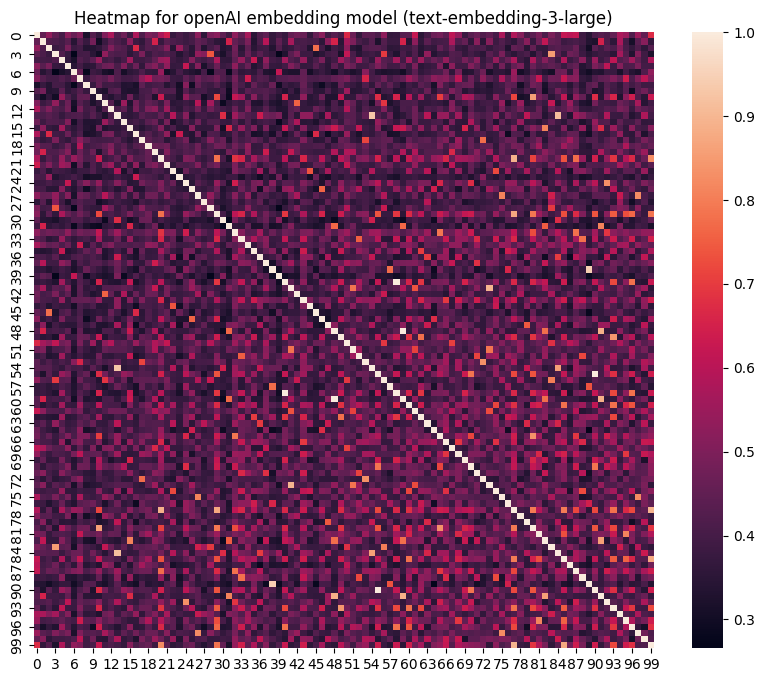

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(openAI_sentences_similarity)
plt.title(f"Heatmap for openAI embedding model (text-embedding-3-large)")
plt.show()

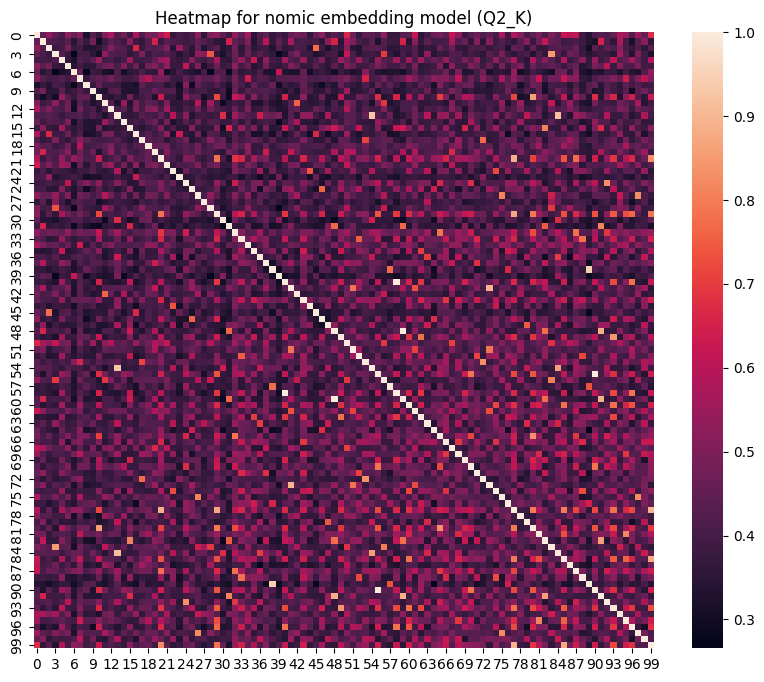

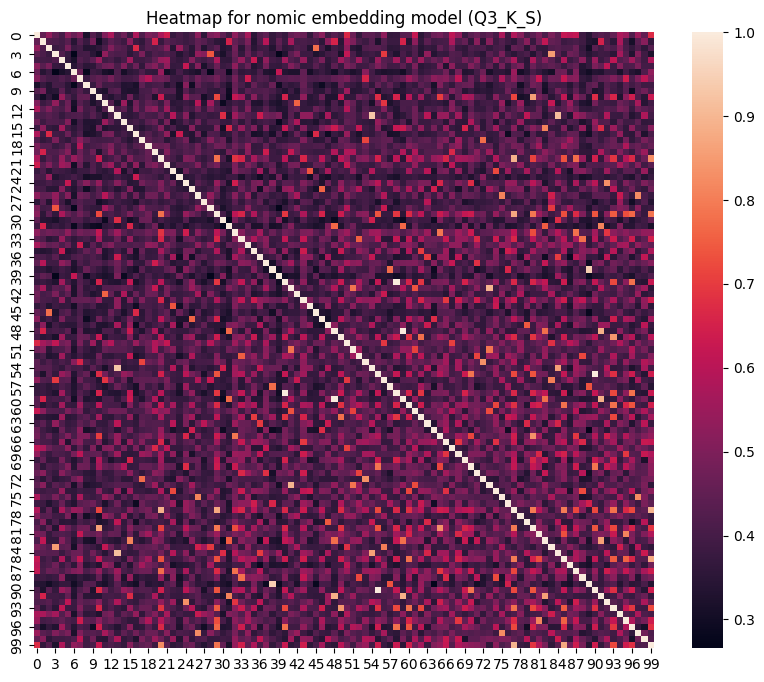

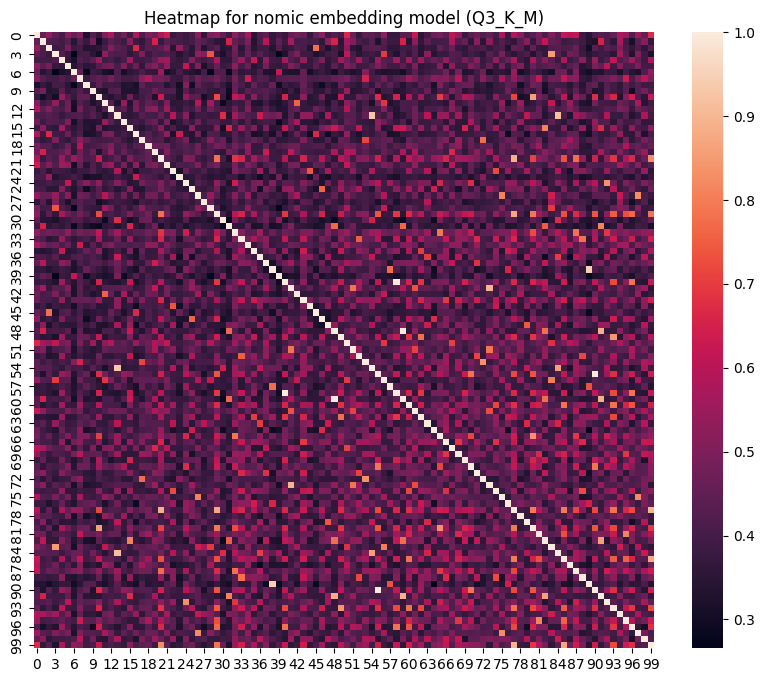

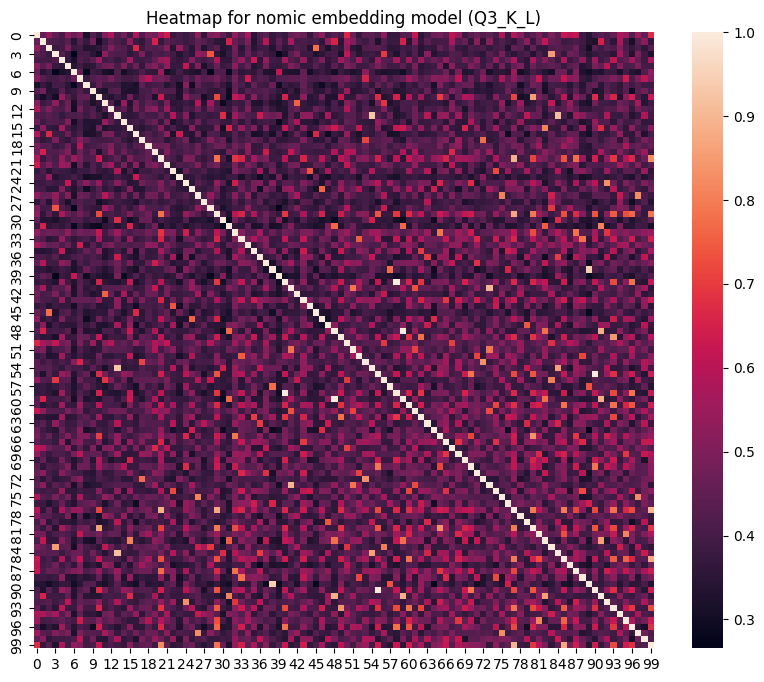

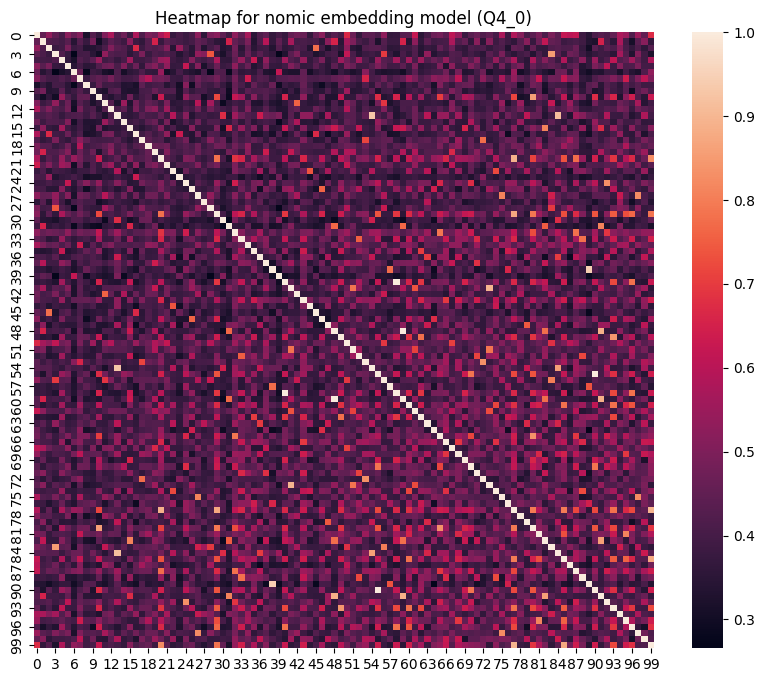

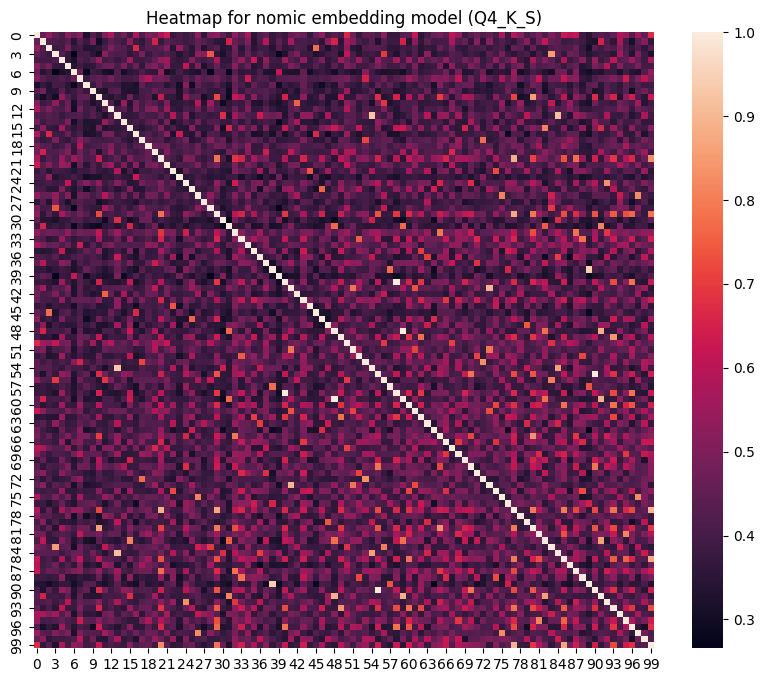

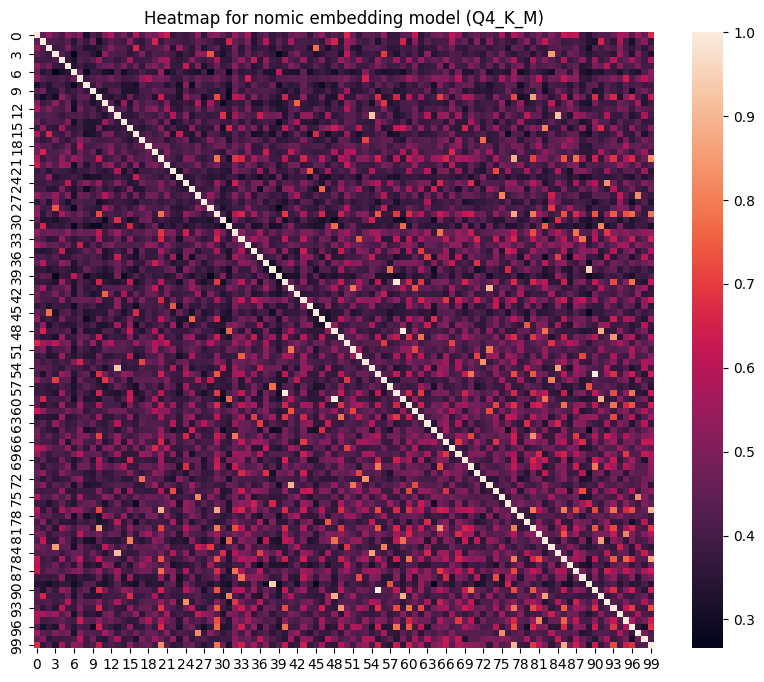

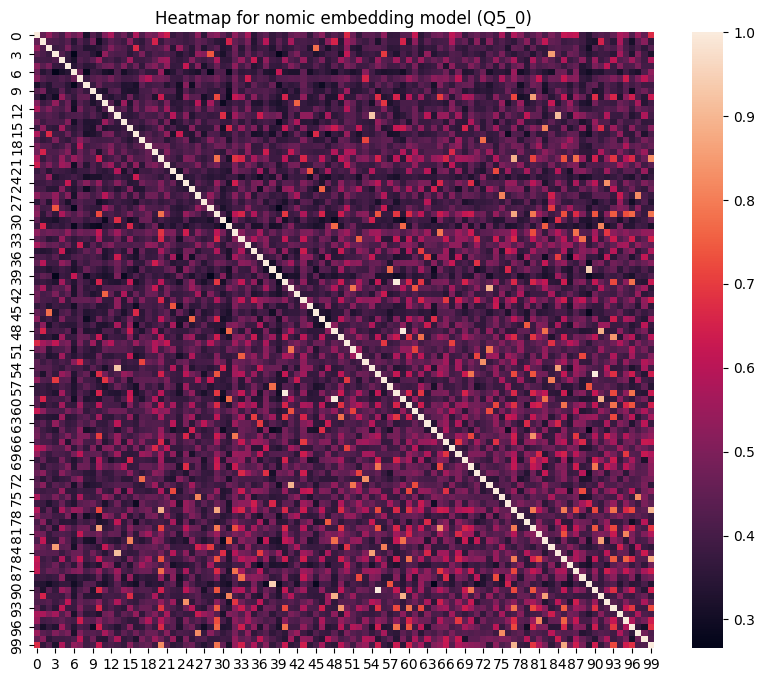

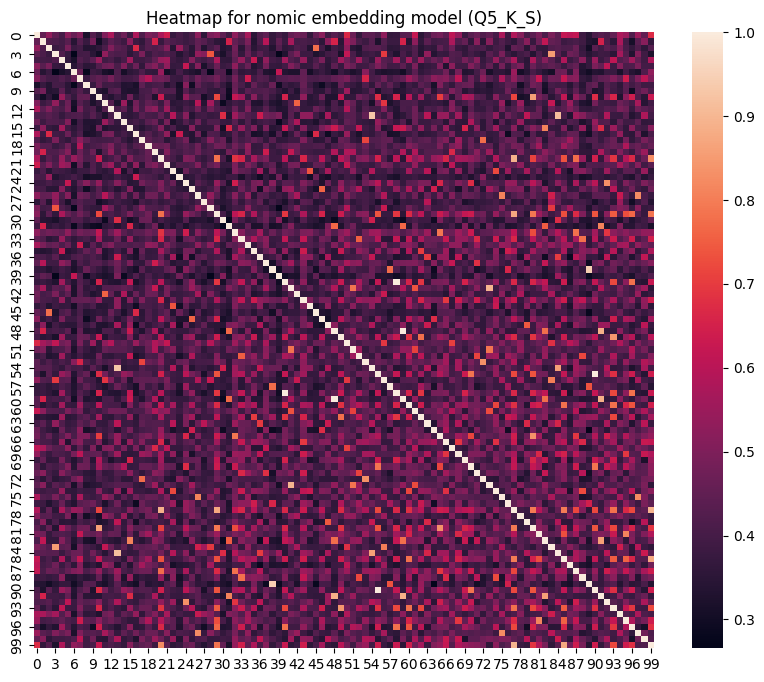

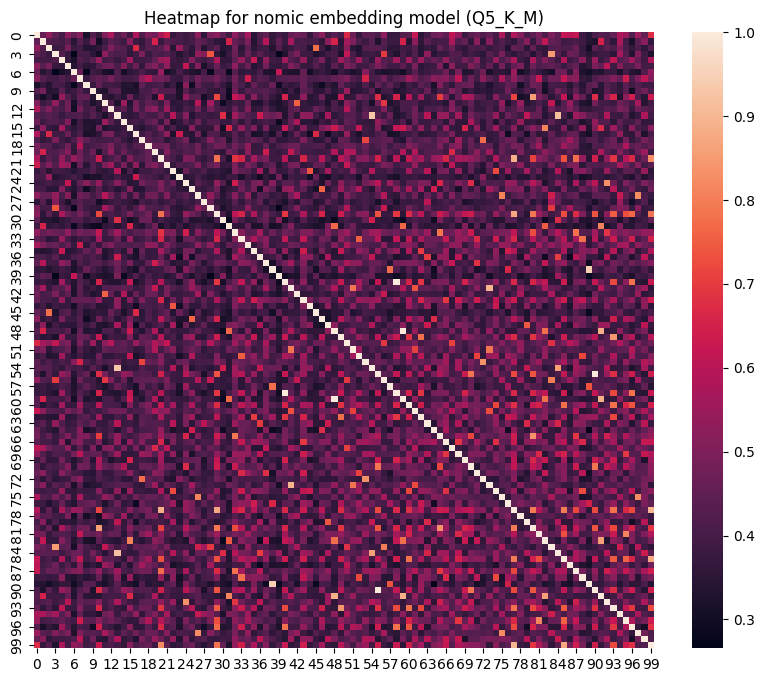

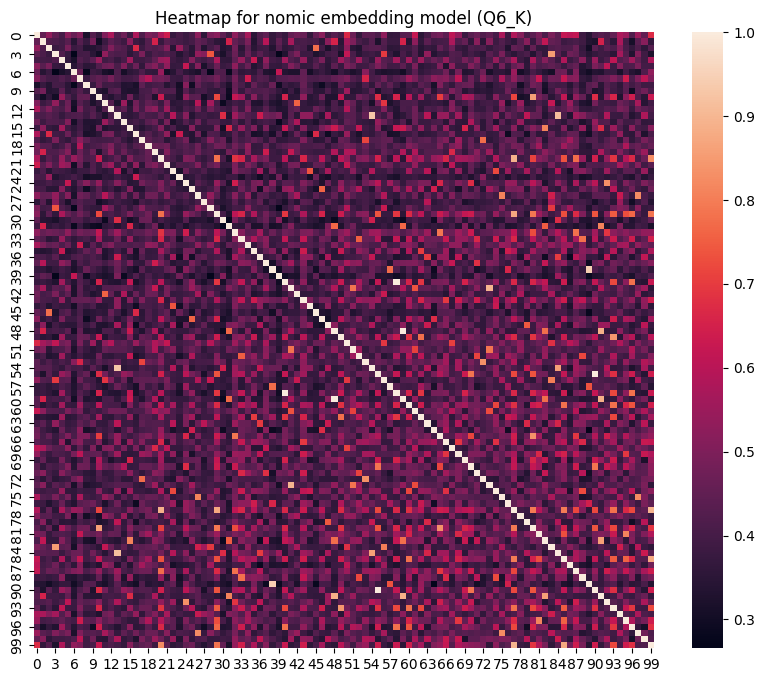

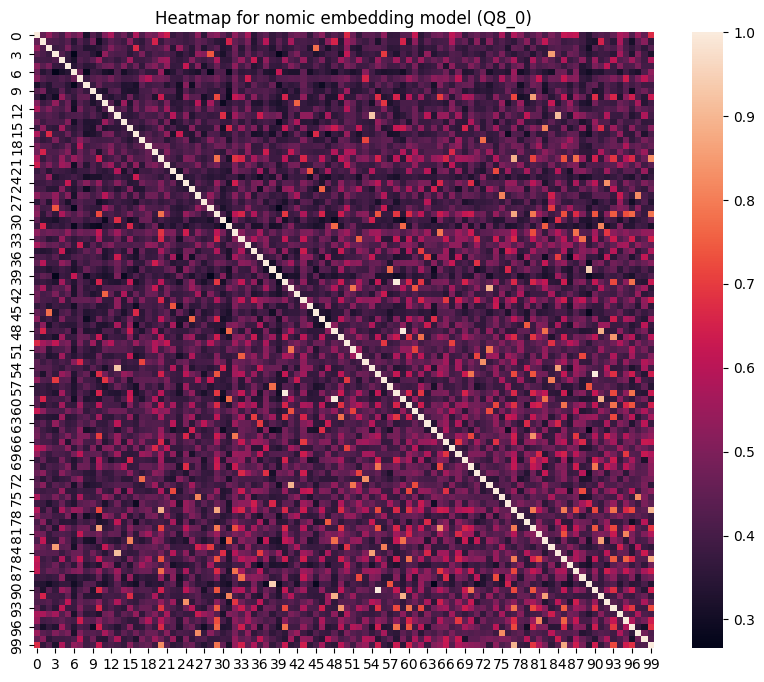

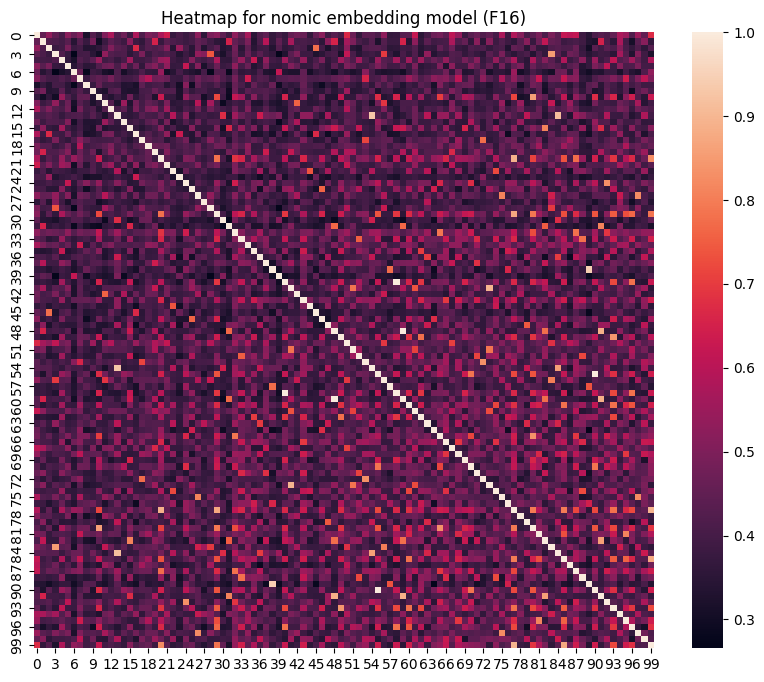

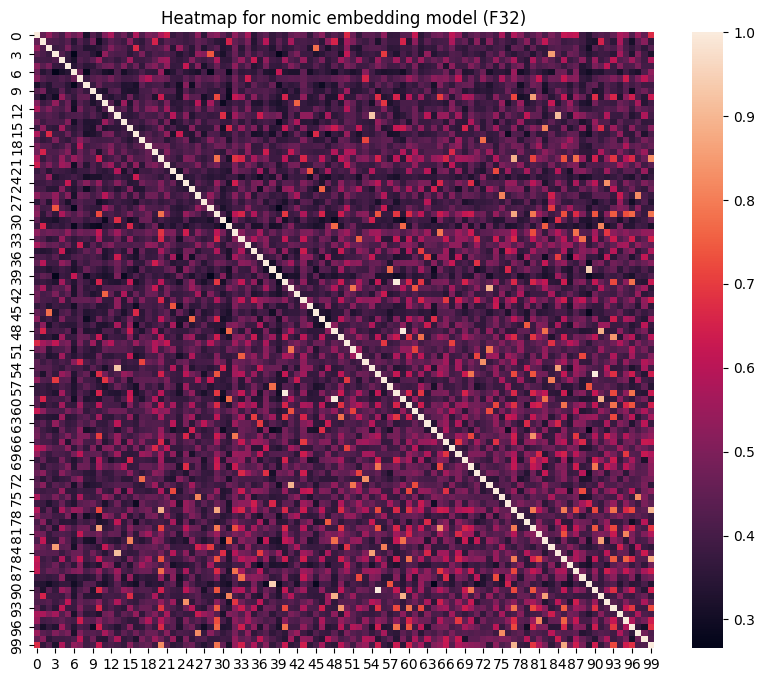

In [33]:
nomic_similarities = {}

for quantization in nomic_embedds_df.columns:
    nomic_sentences_similarity = pd.DataFrame(index=nomic_embedds_df.index, columns=nomic_embedds_df.index, dtype=float)
    sentences_keys = persian_sentences.keys()
    
    for num_col in range(len(sentences_keys)):
        for num_row in range(num_col, len(sentences_keys)):
            a = nomic_embedds_df[quantization][num_col]
            b = nomic_embedds_df[quantization][num_row]
    
            similarity = cosine_similarity(a,b)[0][0]
            nomic_sentences_similarity[num_col][num_row] = similarity
            nomic_sentences_similarity[num_row][num_col] = similarity

    nomic_similarities[quantization] = nomic_sentences_similarity
    plt.figure(figsize=(10, 8))
    sns.heatmap(openAI_sentences_similarity)
    plt.title(f"Heatmap for nomic embedding model ({quantization})")
    plt.show()

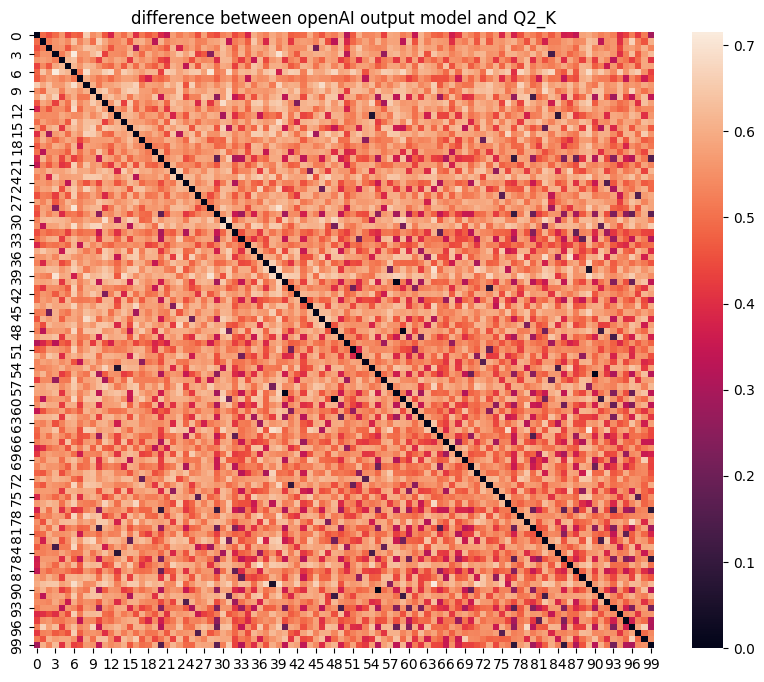

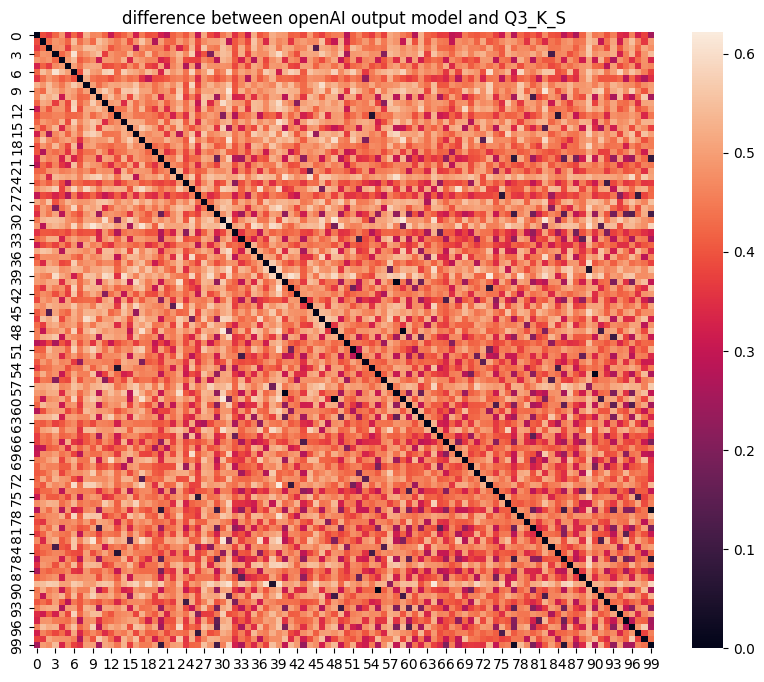

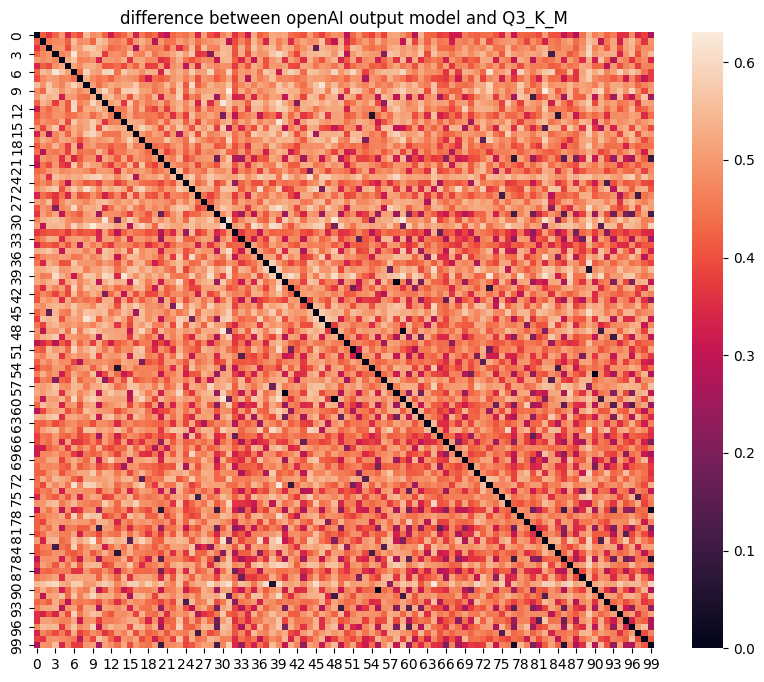

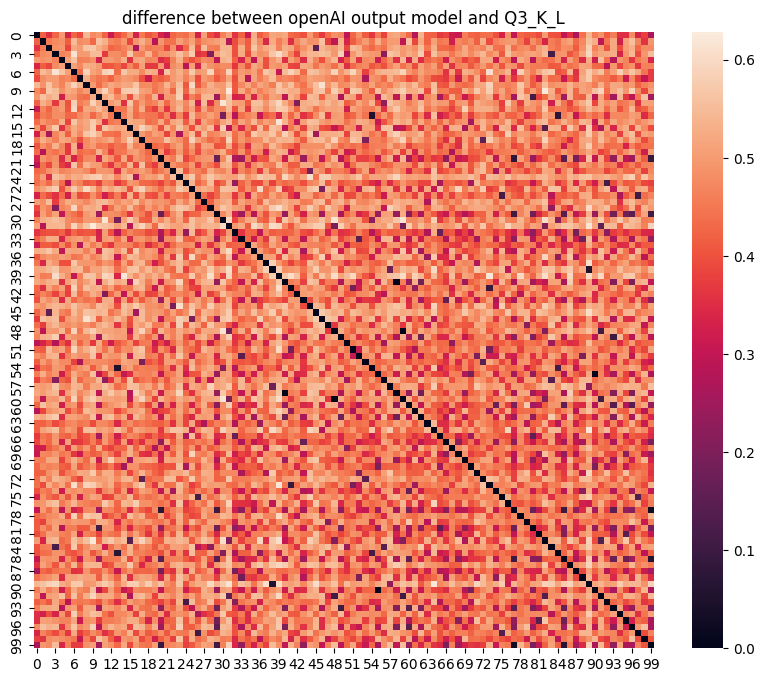

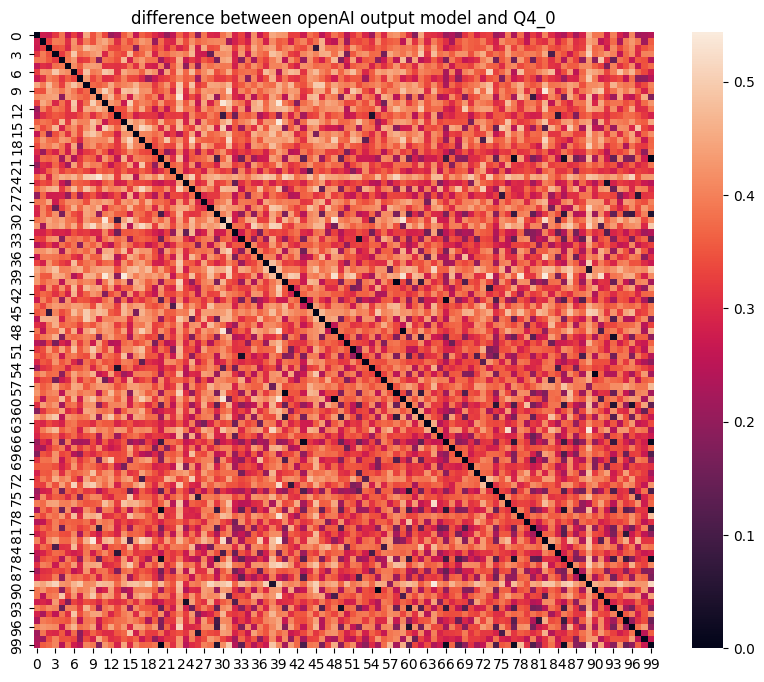

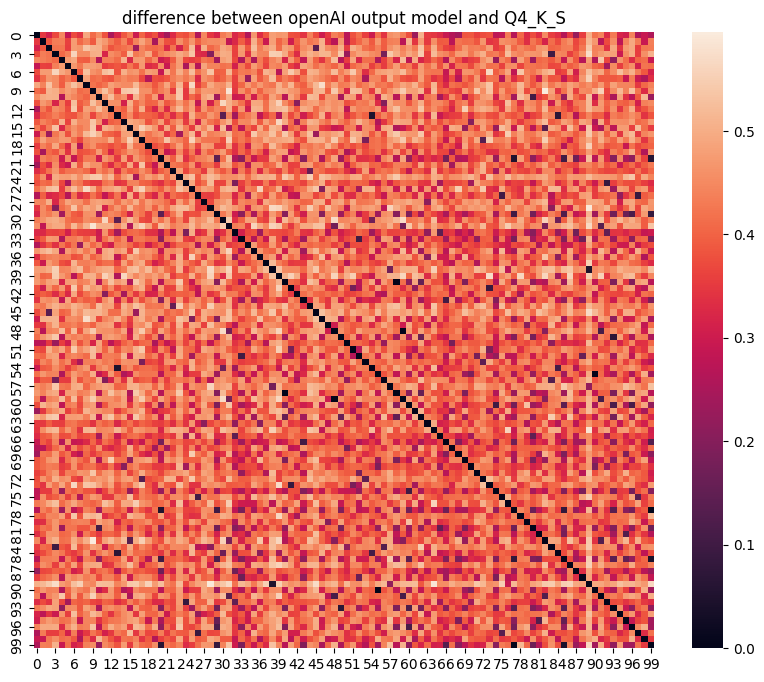

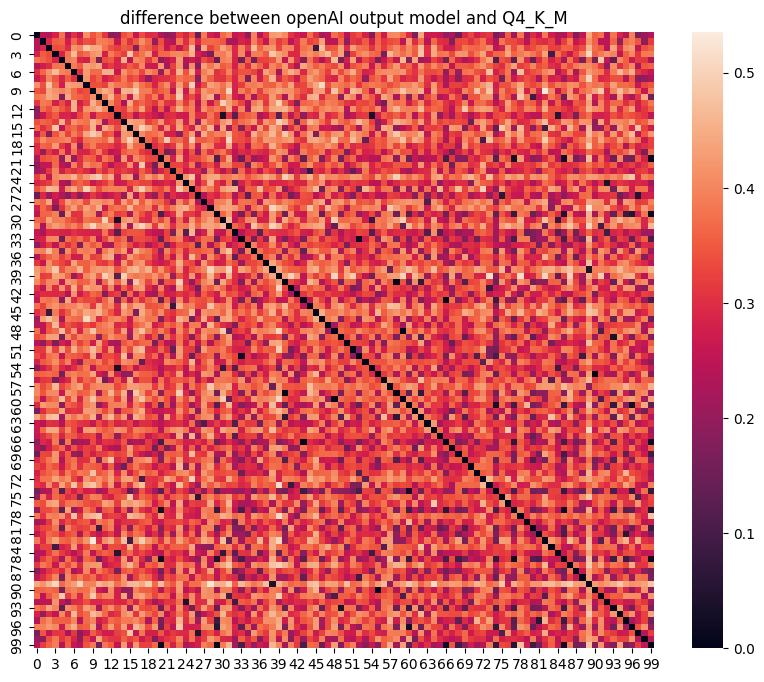

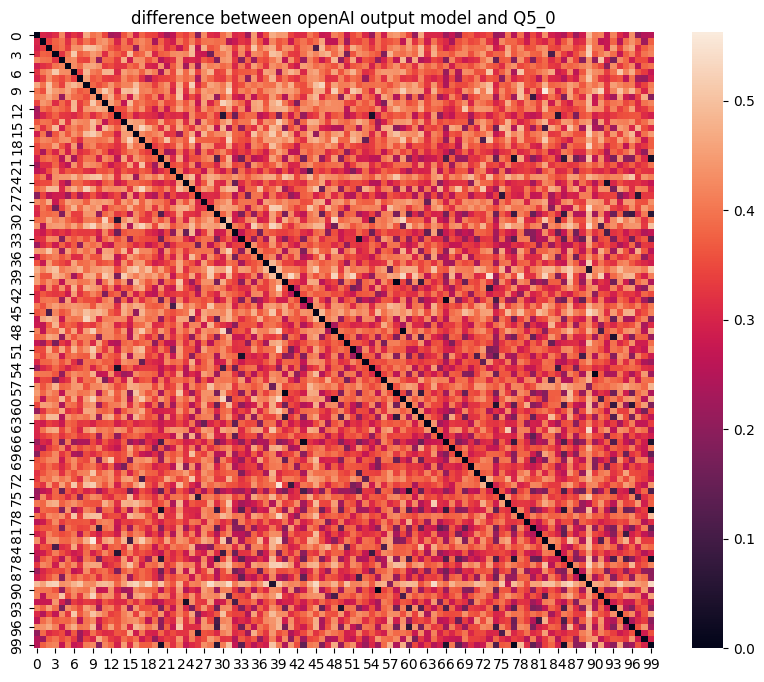

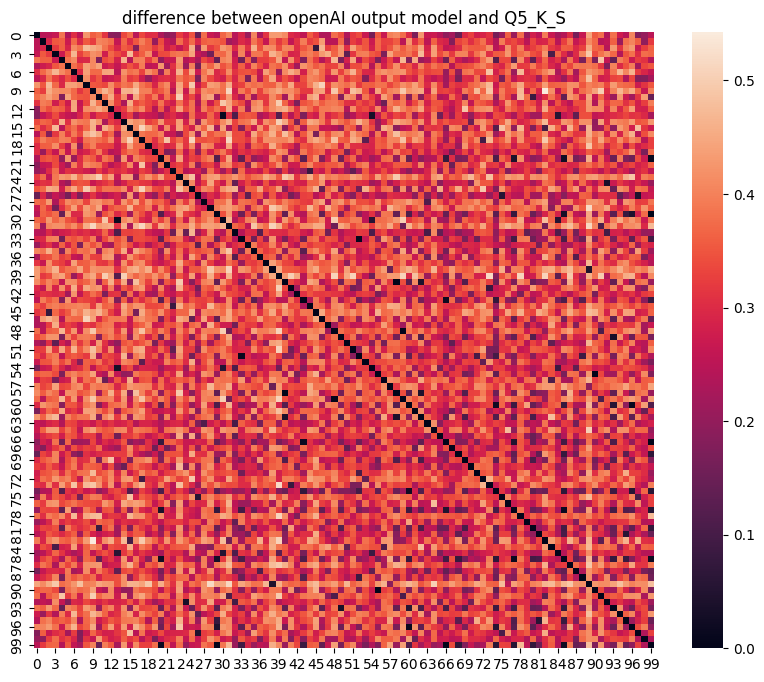

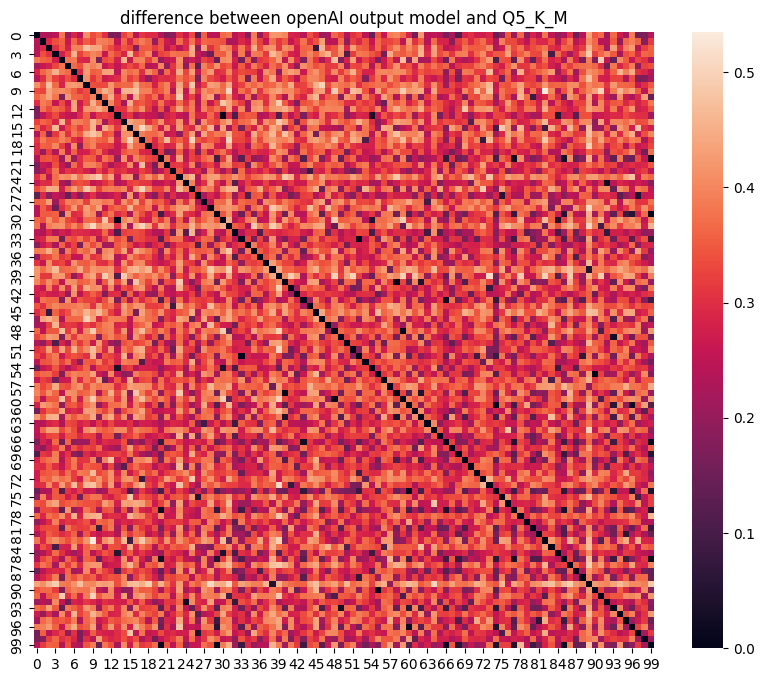

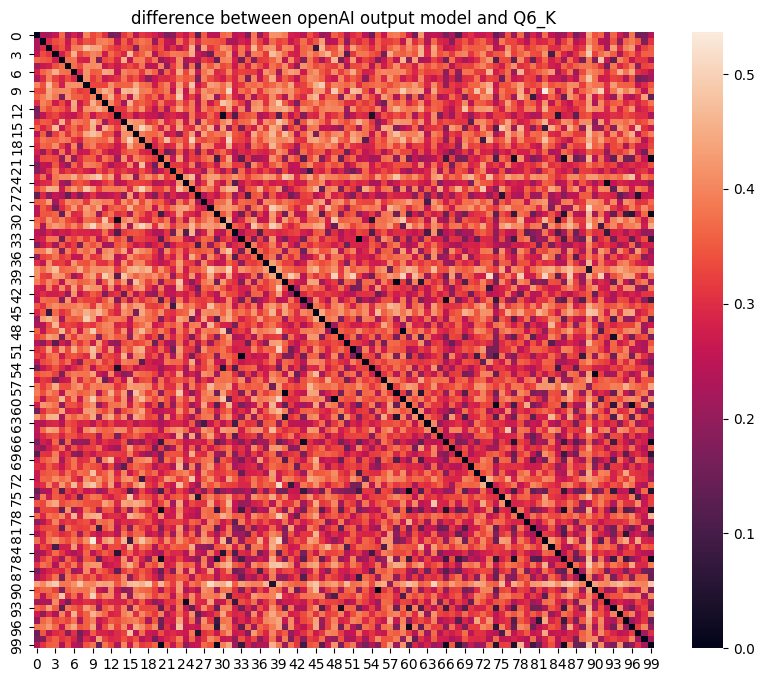

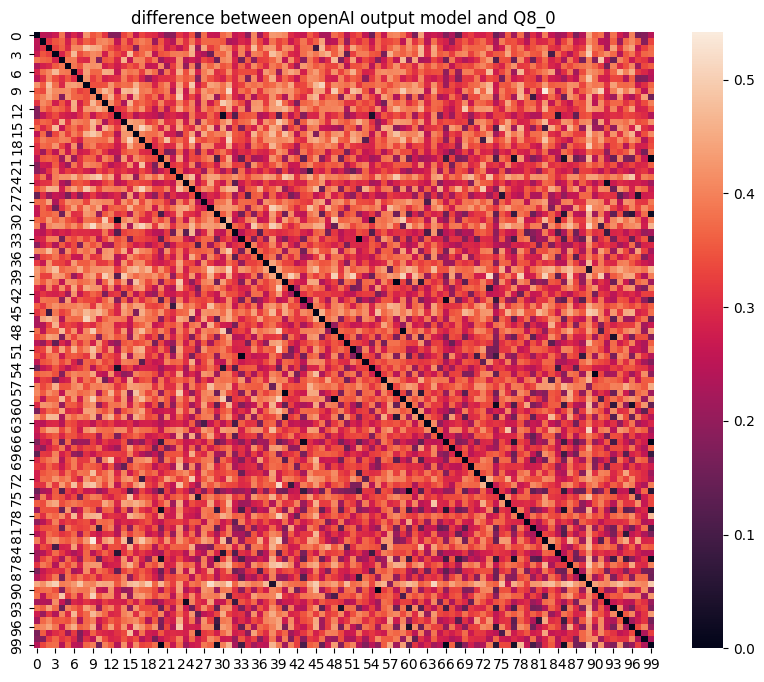

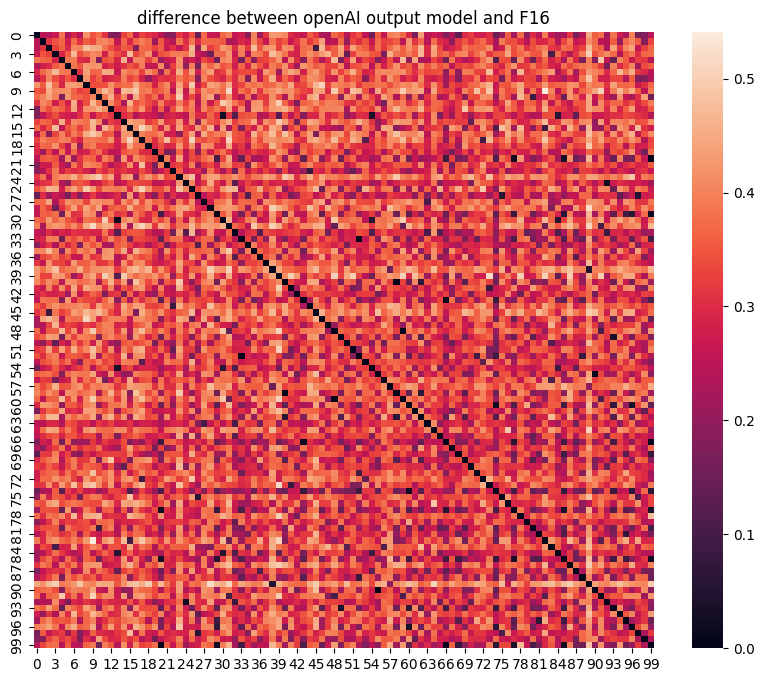

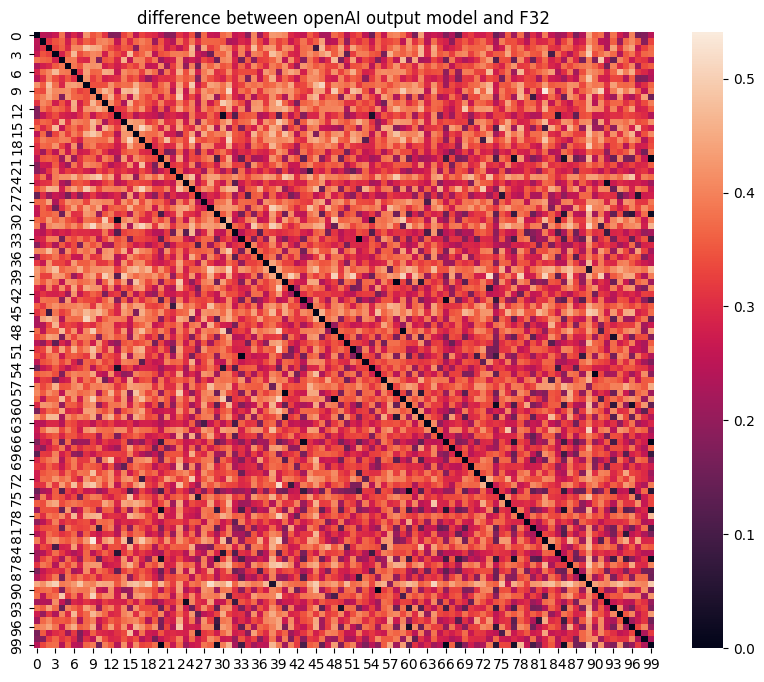

In [69]:
absolute_difference = {}

for quantization, nomic_quantization_similarity  in nomic_similarities.items():
    difference_df = abs(openAI_sentences_similarity - nomic_quantization_similarity)
    absolute_difference[quantization] = difference_df.sum().sum() / 2
    plt.figure(figsize=(10, 8))
    sns.heatmap(difference_df)
    plt.title(f"difference between openAI output model and {quantization}")
    plt.show()

In [74]:
pd.DataFrame({
    "Diffrence Rate (with OpenAI Embedding)": absolute_difference,
    "Mean Elapsed Time to Embedd": nomic_times_df.mean(),
    "Sum of Elaped Time to Embedd": nomic_times_df.sum(),
}).sort_values(by="Diffrence Rate (with OpenAI Embedding)")

,Diffrence Rate (with OpenAI Embedding),Mean Elapsed Time to Embedd,Sum of Elaped Time to Embedd
Q5_K_M,1554.077178,0.027150,2.715048
Q6_K,1560.647243,0.029440,2.943958
Q5_K_S,1588.924371,0.030906,3.090578
F16,1596.610724,0.027915,2.791515
F32,1596.612840,0.030803,3.080292
Q8_0,1601.701500,0.028978,2.897778
Q4_K_M,1609.739826,0.030235,3.023534
Q4_0,1708.379852,0.026969,2.696908
Q5_0,1750.512113,0.027684,2.768356
Q4_K_S,1991.548270,0.029989,2.998949
